In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Local Outlier Factor 
### unsupervised (semi-supervised) anomaly detection machine leaning algorithm 

In [3]:
normal = pd.read_csv('Normal.csv')
normal = normal.drop(['User'], axis=1)

In [4]:
abnormal = pd.read_csv('Abnormal.csv')
abnormal = abnormal.drop(['User'], axis=1)

In [5]:
combined = pd.read_csv('Combined.csv')

In [6]:
# normal prediction
lof = LocalOutlierFactor()
inputs = normal.values[0].reshape(-1, 1)

prediction = lof.fit_predict(inputs)
if -1 not in prediction:
    print('normal')
else:
    print('abnormal')
    
for i,j in zip(prediction, inputs):
    print(i,j)

normal
1 [17.135]
1 [15.972]
1 [25.729]
1 [17.787]
1 [17.286]
1 [21.169]
1 [28.685]
1 [21.328]
1 [17.818]
1 [21.667]
1 [17.616]
1 [22.182]
1 [27.491]
1 [27.953]
1 [17.645]
1 [26.142]
1 [24.72]
1 [26.346]
1 [20.361]
1 [18.388]
1 [24.114]
1 [22.071]
1 [19.106]
1 [22.04]
1 [27.666]
1 [28.388]
1 [20.047]
1 [20.655]
1 [22.649]
1 [26.831]
1 [15.918]
1 [21.845]
1 [25.001]
1 [29.83]
1 [24.375]
1 [26.378]


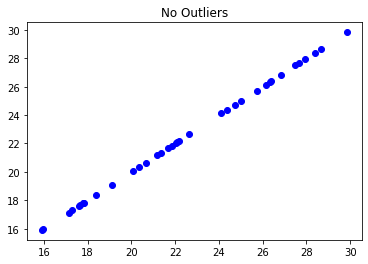

In [7]:
# for graph
outlier = []
inlier = []
for i, j in zip(inputs, prediction):
    if j==-1:
        outlier.append(float(i[0]))
    else:
        inlier.append(float(i[0]))
plt.title('No Outliers')
plt.scatter(inlier, inlier, color='b')
plt.scatter(outlier, outlier, color='r')
plt.show()

In [8]:
# abnormal prediction
lof = LocalOutlierFactor()
inputs = abnormal.values[0].reshape(-1, 1)

columnList = abnormal.columns.to_list()

prediction = lof.fit_predict(inputs)
if -1 not in prediction:
    print('normal')
else:
    print('abnormal')

# display month and year if result is abnormal
for i in range(len(inputs)):
    if prediction[i]!=-1:
        print(prediction[i], inputs[i])
    else:
        print(prediction[i], inputs[i], columnList[i])

abnormal
1 [10.434]
1 [9.54]
1 [9.876]
1 [9.771]
-1 [3.361] May_2015
-1 [4.777] June_2015
-1 [3.12] July_2015
-1 [5.755] August_2015
-1 [7.855] September_2015
1 [9.982]
1 [10.452]
1 [10.241]
1 [13.07]
1 [13.676]
1 [15.092]
1 [14.561]
1 [13.001]
1 [14.243]
1 [14.149]
1 [13.468]
1 [12.469]
1 [13.295]
1 [13.425]
1 [13.738]
1 [11.504]
1 [10.869]
1 [11.476]
1 [11.652]
1 [12.232]
1 [11.843]
1 [11.65]
1 [10.861]
1 [10.63]
1 [10.879]
1 [11.445]
1 [12.081]


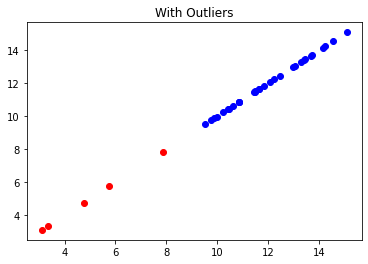

In [9]:
# for graph
outlier = []
inlier = []
for i, j in zip(inputs, prediction):
    if j==-1:
        outlier.append(float(i[0]))
    else:
        inlier.append(float(i[0]))

plt.title('With Outliers')
plt.scatter(inlier, inlier, color='b')
plt.scatter(outlier, outlier, color='r')
plt.show()

In [10]:
# getting accuracy and other evaulation metrics

X = combined.drop(['Target'], axis=1)
y = combined['Target']

lof = LocalOutlierFactor()

# getting prediction per input in the dataset
pred = []
for i in range(len(X)):
    inputs = X.values[i].reshape(-1, 1)
    prediction = lof.fit_predict(inputs)
    if -1 not in prediction : 
        pred.append('Normal')
    else:
        pred.append('Abnormal')
        
n = 0 # normal
a = 0 # abnormal
na = 0 # normal classified as abnormal
an = 0 # abnormal classified as normal
score = 0 # score for accuracy

for i, j in zip(y, pred):
    # get accuracY
    if i==j:
        score+=1
    
    # get confusion matrix
    if i==j and i=='Normal':
        n+=1
    elif i==j and i=='Abnormal':
        a+=1
    elif i!=j and i=='Normal':
        na+=1
    elif i!=j and i=='Abnormal':
        an+=1

print('Accuracy: '+str((score/len(X))*100))
print('Classified Normal as Normal: '+str(n))
print('Classified Abnormal as Abnormal: '+str(a))
print('Classified Normal as Abnormal: '+str(na))
print('Classified Abnormal as Normal: '+str(an))

Accuracy: 90.03322259136213
Classified Normal as Normal: 121
Classified Abnormal as Abnormal: 150
Classified Normal as Abnormal: 30
Classified Abnormal as Normal: 0


In [11]:
customInput = [['17.135', '15.972', '25.729', '17.787', '17.286', '21.169',
       '28.685', '21.328', '17.818', '21.667', '17.616', '22.182',
       '27.491', '27.953', '17.645', '26.142', '24.72', '26.346',
       '20.361', '18.388', '24.114', '20.071', '19.106', '22.04',
       '27.666', '28.388', '20.047', '20.655', '22.649', '26.831',
       '15.918', '21.845', '25.001', '29.83', '24.375', '26.378']]

lof = LocalOutlierFactor()
inputs = np.array(customInput).reshape(-1, 1)


start = time.time() # start timer
prediction = lof.fit_predict(inputs)
print('Stop 1 prediction output: ' + str(prediction))
stop1 = time.time() # end timer
if -1 not in prediction:
    print('Stop 2 prediction output: ' + str('Normal'))
else:
    print('Stop 2 prediction: ' + str('Abnormal'))
stop2 = time.time() # end timer
    

print(f'Training and Predict Time1: {stop1-start}s')
print(f'Training and Predict Time2: {stop2-start}s')

Stop 1 prediction output: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Stop 2 prediction output: Normal
Training and Predict Time1: 0.003989219665527344s
Training and Predict Time2: 0.003989219665527344s


## Training Time

In [23]:
start = time.time() # start timer
prediction = lof.fit(X)
stop = time.time() # end timer
print(f'Training Time: {stop-start}s')

Training Time: 0.006980180740356445s


## Confusion Matrix

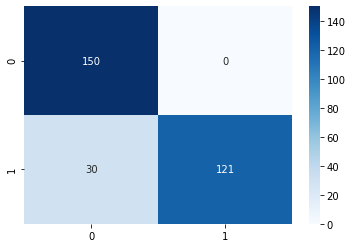

In [24]:
conf_matrix = confusion_matrix(y, pred)
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt='g')
plt.show()